### Чем хороша линейная регрессия?
* Быстрая
* Простая в осовении
* Мало параметров, которые надо подкручивать
* Легко интерпретируемая

### Библиотеки
Основная библиотека, с которой вы будете работать в этом курсе, это [scikit-learn](http://scikit-learn.org). На сайте есть описание всех моделей, а также User Guides к ним. Стоит почитать на досуге.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Датасет о рекламной кампании

In [3]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


В датасете показаны результаты продаж разных товаров в зависимости от ресурсов (тысяч долларов), которые вложили в различные средства распространения информации:
* TV - реклама по телевизору
* radio - на радио
* newspapers - в газетах

Целевая переменная:
* sales - продажи такого-то товара (тысячи штук)

In [4]:
# Размеры датасета
data.shape

(200, 4)

Признаков немного, поэтому давайте попробуем визуализиовать зависимость целевой переменной от каждого из признаков.

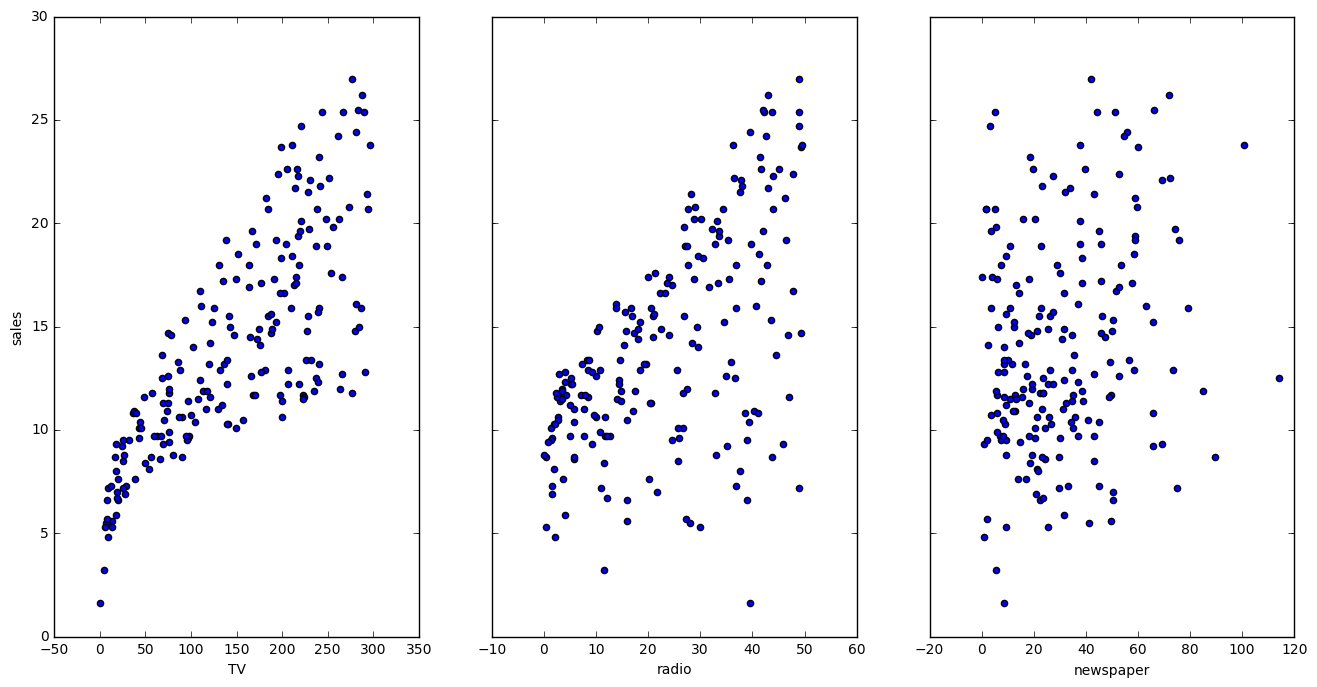

In [5]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

### Простая линейная регрессия

Из графиков выше предположим, что только размер рекламы на телевизоре влияет на продажи больше всего. Формула для такого случая выглядит следующим образом:
$$y=\beta_0+\beta_1x$$
Здесь:
* $y$ - наше предсказание продаж
* $x$ - сколько денег вложили в рекламу по телевидению
* $\beta_0$ - сдвиг
* $\beta_1$ - параметр, отвечающий за важность признака x

$\beta_0$ и $\beta_1$ - это параметры нашей модели. Чтобы создать хорошую модель, надо "обучить" эти значения. Т.е. изменить их так, чтобы они хорошо работали для нашей задачи.

### Обучение коэффициентов модели

Параметры $\beta_0$ и $\beta_1$ подбираются таким образом, чтобы минимизировать **сумму наименьших квадратов ошибок**:

<img src="https://github.com/justmarkham/DAT4/raw/068d887e4be2eedb1b958b345ae097153f762d75/notebooks/08_estimating_coefficients.png">

* Чёрные точки на даграмме - это полученные истинные значения x и y.
* Синяя линия - это наша модель: линия, которой мы стараемся приблизить данные.
* Красные отрезки - это ошибки нашей модели.

Как коэффициенты $\beta_0$ и $\beta_1$ соотносятся с синей линией:
* $\beta_0$ - это сдвиг нашей прямой, т.е. значение y при x = 0.
* $\beta_1$ - это тангенс угла наклона прямой.
<img src="https://github.com/justmarkham/DAT4/raw/068d887e4be2eedb1b958b345ae097153f762d75/notebooks/08_slope_intercept.png">

Как искать данные коэффициенты? Есть много техник: аналитическое решение, методы основанные на градиентном спуске. Пока же достаточно знать, что многие библиотеки (в том числе и sklearn) умеют это делать. Зачем кожаному мешку напрягаться :)

In [43]:
from sklearn.linear_model import LinearRegression

# Наша модель
reg = LinearRegression()

# Подготовим данные для неё
# На вход требуется 2D матрица, а у нас только один признак,
# и надо превратить его из 1D вектора (n,) в 2D матрицу (n, 1).
# Это можно сделать с помощью метода reshape
x = data["TV"].values.reshape(-1, 1) 
y = data["sales"].values

# Обучаем нашу модель
reg.fit(x, y)

# Коэффициенты
print("Сдвиг={}".format(reg.intercept_))
print("Массив коэффициентов={}".format(reg.coef_))

KeyError: 'TV'

### Интерпретируем коэффициенты
Что означает коэффициент, связанный с телевидением ($\beta_1$)?
* Дополнительные 1000$, вложенные на в рекламу на телевидении, позволят продажам товара вырасти где-то на 0.047 * 1000 = 47 тысяч единиц.

### Используем модель для предсказания

Окей, допустим мы выходим на новый рынок, в котором на телевидение мы готовы потратить 50000 долларов. Сколько товара это нам даст?
$$y=7.032594+0.047537 * 50$$

In [7]:
# Посчитаем ручками
7.032594 + 0.047537*50

9.409444

Всего мы продадим 9409 единиц товара. А давате теперь спросим sklearn:

In [8]:
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


In [9]:
reg.predict(X_new)

array([ 9.40942557])

### Нарисуем нашу прямую

In [10]:
# Возьмём предсказания для данных, на которых обучались
y_pred = reg.predict(x)
y_pred.shape

(200,)

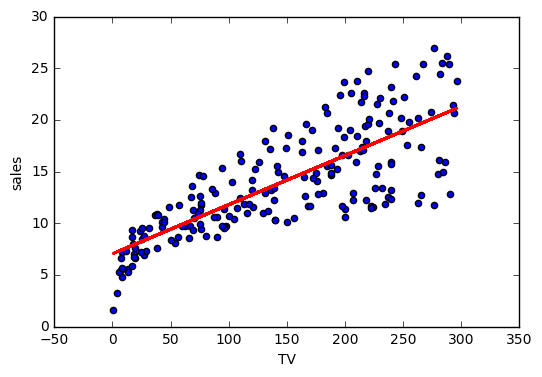

In [11]:
# Сначала выведем истинные данные
data.plot(kind='scatter', x='TV', y='sales')

# Теперь рисуем нашу линию
plt.plot(x, y_pred, c='red', linewidth=2)

Посчитаем ошибку MSE на обучающей выборке:

In [12]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_pred, y))

10.5126529157


### Используем все признаки

Простую линейную регрессию с одним признаком можно легко расширить на случай нескольких признаков:
$$y=\beta_0+\beta_1x_1+...+\beta_nx_n$$

А для нашего датасета это будет выглядеть так:
$$Sales=\beta_0+\beta_1*TV+\beta_2*radio+\beta_3*newspaper$$

Давайте опять воспользуемся sklearn, чтобы их оценить:

In [13]:
reg = LinearRegression()

X = data.drop("sales", axis=1)
y = data["sales"]

# Обучаем нашу модель
reg.fit(X, y)

# Коэффициенты
print("Сдвиг={}".format(reg.intercept_))
for column, coef in zip(X.columns, reg.coef_):
    print("Коэффициент для {}={}".format(column, coef))

Сдвиг=2.9388893694594085
Коэффициент для TV=0.045764645455397615
Коэффициент для radio=0.18853001691820448
Коэффициент для newspaper=-0.0010374930424763007


Вес признака отвечает также, как и в предыдущем случае за значимость этого признака. Для газет он вообще отрицательный. Вычислим ошибку на обучающей выборке.

In [14]:
y_pred = reg.predict(X)

# Ошибка теперь равна:
print(mean_squared_error(y_pred, y))

2.78412631451


Ошибка уже меньше, чем при одном признаке, однако измерять ошибку на обучающей выборке неправильно. Помимо истинной зависимости между признаками и целевой переменной, туда могут затесаться случайности, лишние данные и прочие факторы. Если не ограничивать каким-то образом модель (об этом мы узнаем позднее), то модель легко подстраивается под эти шумы. Она начинает показывать очень хорошее качество на обучающей выборке, но когда мы попробуем посмотреть качество на других выборках, то там модель будет показывать себя плохо. Наглядный пример:
<img src="https://i.stack.imgur.com/t0zit.png">

Посередине находится правильная модель, которая угадала истинную зависимость. Справа видно переобученную модель, которая на обучающей выборке (красные крестики) показывает очень хорошее качество, но из рисунка видно, что истинную зависимость она точно не нашла.

Говорят, что такая модель имеет высокую *Variance* (дисперсия). *Variance* - это чувствительность модели к разным выбросам, аномалиям в данных. Если такую модель обучить на немного отличающихся данных, то результаты будут сильно разными.

Слева изображена противоположная ситуация - недообученная модель. Это происходит из-за того, что прямой линией как ни крути не найти истинную зависимость. Т.е. модель слишком простая для такой задачи. Говорят, что у такой модели высокий *bias*, т.е. средняя величина ошибки. Следующая картинка показывает наглядно, что это такое:
<img src="https://elitedatascience.com/wp-content/uploads/2017/06/Bias-vs.-Variance-v5-2-darts.png">

Поэтому в таком случае, для начала разбивают имеющиеся данные на обучающую и тестовую выборки.

In [15]:
# Возьмём 100 для обучения и 100 для теста
threshold = 100
X_train = data.drop('sales', axis=1)[:threshold]
y_train = data["sales"][:threshold]

X_test = data.drop('sales', axis=1)[threshold:]
y_test = data["sales"][threshold:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((100, 3), (100, 3), (100,), (100,))

Обучаемся на обучающей выборке и проверяем качество на тестовой.

In [16]:
reg = LinearRegression()
reg.fit(X_train, y_train)

# Ошибка на тестовой выборке
y_pred = reg.predict(X_test)
# Вычислим ошибку и на обучающей выборке для проверки
y_pred_train = reg.predict(X_train)

print("Ошибка на обучающей выборке={0:.2f}".format(mean_squared_error(y_pred_train, y_train)))
print("Ошибка на тестовой выборке={0:.2f}".format(mean_squared_error(y_pred, y_test)))

Ошибка на обучающей выборке=2.32
Ошибка на тестовой выборке=3.38


Как видно, ошибка на тестовой выборке больше, чем на обучающей. Но вам может повезти и всё будет наоборот (на самом деле, я менял threshold до тех пор, пока ошибка на тестовой выборке не будет больше, чем на обучающей. Только тсс..). Чтобы не было таких случайностей, была придумана кросс-валидация.

### Кросс-валидация

Как она работает? Мы делим все имеющиеся данные на $k$ частей. Затем по очереди каждую часть назначем тестовой. На остальных обучаемся, а ошибку измеряем на выбранной части. А затем из всех ошибок находим среднюю. Так у нас не будет той случайности, когда мы удачно поделим выборку.

In [17]:
# Многие выбирают k=5 для начала
k = 5
errors = []

X = data.drop("sales", axis=1)
y = data["sales"]

# Размер одной части
fold_size = len(X) // k

# Мб этот код на семинаре написать?
for i in range(k):
    # Берём все значения, кроме выбранной части
    X_train = X[:i * fold_size].append(X[(i + 1) * fold_size:])
    y_train = y[:i * fold_size].append(y[(i + 1) * fold_size:])
    
    # Берём выбранную часть
    X_test = X[i * fold_size:(i + 1) * fold_size]
    y_test = y[i * fold_size:(i + 1) * fold_size]
    
    # На каждой итерации обучаемся отдельно и сохраняем ошибку
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    errors.append(mean_squared_error(y_pred, y_test))
    
# Выводим ошибку на кросс-валидации
print(np.average(errors))

3.0729465971


In [22]:
# А можно не париться и попросить sklearn всё сделать за нас
from sklearn.cross_validation import cross_val_score

# Берём с отрицательным знаком, т.к. обычно туда передаётся не функция потерь, которую надо минимизировать
# А что-то вроде "функции успеха", которую надо максимизировать
errors = -cross_val_score(LinearRegression(), X, y, cv=5, scoring='neg_mean_squared_error')
print(np.average(errors))

ValueError: 'neg_mean_squared_error' is not a valid scoring value. Valid options are ['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'log_loss', 'mean_absolute_error', 'mean_squared_error', 'median_absolute_error', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc']

Видно, что ошибка больше, чем тогда на обучающей выборке, поэтому есть показания думать, что это переобучение. Отчего оно обычно происходит? Мы берём слишком много лишних признаков или делаем модель слишком сложной для данной задачи. Для решения этой задачи существует регуляризация.

### Регуляризация

Регуляризация - это искусстенное занижение всех параметров моделей ($\beta_0,\beta_1,...$). Это помогает упростить модель, т.к. низкие значения $\beta_i$ означают, что модель будет выдавать результаты близкие к прямой (или гиперплоскости, если параметров много). А также зануление некоторых коэффициентов может убрать ненужные признаки из обучения. Однако как всё это сделать так, чтобы не убрать нужные признаки?

Посмотрим на функцию потерь, которую мы минимизируем:
$$L(\beta)=\sum_{i=1}^{N}(y^{true}_i-y^{pred}_i)^2$$

Добавим туда слагаемое, которое поможет нам понизить значения наших $\beta_i$:
$$L(\beta)=\sum_{i=1}^{N}(y^{true}_i-y^{pred}_i)^2 + \lambda \sum_{i=1}^m\beta_i^2$$

Действительно, если мы будем понижать нашу функцию потерь $L(\beta)$, то мы будем минимизировать и второе слагаемое, которое и отвечает за абсолютные величины $\beta_i$. Осталось указать, что $\lambda$ это некоторый числовой коэффициент, который позволяет играться между очень сильной и очень слабой регуляризацией. Если он большой, то регуляризация сильная и модель будет более простой, меньше переобучаться, больше недообучаться, и наоброт. 

Забыл добавить, что это была L2-регуляризация.
L1-регуляризация выглядит так:
$$L(\beta)=\sum_{i=1}^{N}(y^{true}_i-y^{pred}_i)^2 + \lambda \sum_{i=1}^m|\beta_i|$$
Она отличается от L2 тем, что она обнуляет некоторые коэффициенты, а L2 пытается всё уменьшать равномерно.

В sklearn L1-регуляризация - это Lasso, а L2-регуляризация - это Ridge. Давайте посмотрим, какое качество они нам дадут на кросс-валидации.

In [19]:
# L1
from sklearn.linear_model import Lasso

reg = Lasso().fit(X, y)

# Посмотрим на коэффициенты модели
# Коэффициенты
print("Сдвиг={}".format(reg.intercept_))
for column, coef in zip(X.columns, reg.coef_):
    print("Коэффициент для {}={}".format(column, coef))
print()

errors = -cross_val_score(Lasso(), X, y, cv=5, scoring='neg_mean_squared_error')
print("Результат={}".format(np.average(errors)))

Сдвиг=3.0402155834803786
Коэффициент для TV=0.045661415380019464
Коэффициент для radio=0.18346439758868255
Коэффициент для newspaper=0.0



NameError: name 'cross_val_score' is not defined

Видно, что признак с рекламой в газетах модель захотела полностью убрать из выборки.

In [20]:
# L2
from sklearn.linear_model import Ridge

reg = Ridge().fit(X, y)

# Посмотрим на коэффициенты модели
# Коэффициенты
print("Сдвиг={}".format(reg.intercept_))
for column, coef in zip(X.columns, reg.coef_):
    print("Коэффициент для {}={}".format(column, coef))
print()

errors = -cross_val_score(Ridge(), X, y, cv=5, scoring='neg_mean_squared_error')
print("Результат={}".format(np.average(errors)))

Сдвиг=2.938967458330147
Коэффициент для TV=0.0457646436580185
Коэффициент для radio=0.18852509681078533
Коэффициент для newspaper=-0.0010362939589069569



NameError: name 'cross_val_score' is not defined

Тут модель полностью не зануляла все признаки, а уменьшила их веса некоторых из них, а некоторых увеличила. Но изменения были столь незначительные, что качество не изменилось.

Как видно, качество не сильно улучшилось. Это всё потому что, мы не подбирали параметр параметр lambda (в моделях он называется alpha), а оставили его равным 1.0. Вот тут нам и приходит на помощь кросс-валидация.

Попробуем сначала Lasso. Давайте сначала поступим по тупому, и будем выбирать параметр lambda на обучающей выборке.

In [22]:
lambdas = np.arange(0.1, 3.0, 0.2)
# Выведем доступные lambda
print("Все лямбды:")
print(lambdas)

# Лямбды и их ошибки на обучающей выборке
lambda_errors = []

# Проходим по всем лямбдам и записываем ошибки на обучающей выборке
for val in lambdas:
    reg = Lasso(alpha=val).fit(X, y)
    y_pred = reg.predict(X)
    # Сохраняем ошибку на обучающей выборке
    lambda_errors.append((val, mean_squared_error(y_pred, y)))
    

min_val, min_train_error = min(lambda_errors, key=lambda x: x[1])

# Вычислим ошибку на кросс-валидации
# Лучшая модель
best_reg = Lasso(alpha=val)
cv_error = -np.average(cross_val_score(best_reg, X, y, cv=5, scoring='neg_mean_squared_error'))

print("\nОптимальная lambda:")
print("Lambda={:.2f}, результат={:.2f}".format(min_val, cv_error))

Все лямбды:
[0.1 0.3 0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9]

Оптимальная lambda:
Lambda=0.10, результат=3.05


А теперь сделайте так, чтобы сохранялась ошибка не на обучающей выборке, а на кросс-валдиации (cross_val_score) и минимум выбирался из неё. 

In [ ]:
### ваш код здесь

Сделайте то же самое для L2-регуляризации:

In [ ]:
### ваш код здесь

Если всё было правильно, то данные манипуляции помогут немного улучшить качество вашей модели. Это поднимет вас на несколько мест в соревнованиях, или вашему работодателю даст побольше прибыли.

### Домашнее задание

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import Imputer
from sklearn.cross_validation import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

%matplotlib inline

Для домашнего задания вы используете другой датасет.

In [42]:
data = pd.read_csv('https://web.stanford.edu/~hastie/Papers/LARS/diabetes.data', sep='\t')
data.head()


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


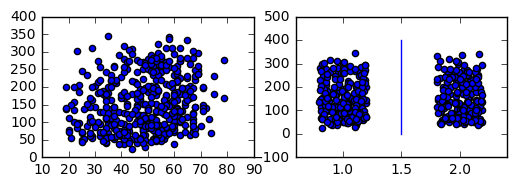

In [33]:
plt.subplot(2, 2, 1)
plt.scatter(data.AGE, data.Y) #просто смотрю данные, пытаюсь понять, что происходит и увидеть глазами прямые зависимости
plt.subplot(2, 2, 2)
plt.scatter(data.SEX + np.random.uniform(-0.2, 0.2, len(data)), data.Y)
plt.plot([1.5, 1.5], [0, 400])

In [36]:
X = data[['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']]
y = data.Y

In [64]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [47]:
model = LinearRegression()
model.fit(train_X, train_y) 

In [60]:
#предскажем на тестовых данных
val = model.predict(train_X)
#и посчитаем среднюю квдратичную и среднюю абсолютную ошибку
print(math.sqrt(mean_squared_error(val, train_y)))
print(mean_absolute_error(val, train_y))


53.46007314341624
43.8381839419


In [61]:
#теперь на тестовых данных
val1 = model.predict(val_X)
print(mean_absolute_error(val1, val_y))
#вроде даже получилось неплохо, потому что ошибка на тестовых данных оказалась даже чутка меньше, чем на тестовых.

41.9829813594


In [94]:
print(model.coef_)
print(model.intercept_)

[ -2.85509013e-02  -2.33585807e+01   6.19875415e+00   1.11496572e+00
  -7.15205210e-01   3.92417153e-01   3.57112191e-03   6.66085435e+00
   5.60394059e+01   2.15827228e-01]
-299.457890273


In [70]:
#руки чешутся попробовать другую модель регрессии, посмотрим что выйдет, исползовать будем то же разбиение данных
model1 = DecisionTreeRegressor(random_state=2)
model1.fit(train_X, train_y)

tree_val = model1.predict(train_X)

print(mean_absolute_error(tree_val, train_y))

tree_val1 = model1.predict(val_X)
print(mean_absolute_error(tree_val1, val_y))
#короче я так понимаю это и есть переобучение, когда очень маленькая ошибка на тестовых данных.
#чтобы такого не было я уменьшу глубину дерева


0.0
64.1081081081


In [82]:
model2 = DecisionTreeRegressor(max_leaf_nodes=10, random_state=2)
#я должен был наверно перебрать значение циклом, но я сделал это ручками и выяснил, что улучшить модель количество глубины
#не получится.
model2.fit(train_X, train_y)

tree_val_lim = model2.predict(train_X)

print(mean_absolute_error(tree_val_lim, train_y))

tree_val_lim1 = model1.predict(val_X)
print(mean_absolute_error(tree_val_lim1, val_y))

38.5135725854
64.1081081081


In [92]:

#вообще я не медик, но есть предложение попробовать просто отказаться от каких либо признаков и посмотреть, 
#как от этого будет изменяться ошибка

data.head()
data1 = data[['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S5']]
data1.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S5
0,59,2,32.1,101.0,157,93.2,38.0,4.8598
1,48,1,21.6,87.0,183,103.2,70.0,3.8918
2,72,2,30.5,93.0,156,93.6,41.0,4.6728
3,24,1,25.3,84.0,198,131.4,40.0,4.8903
4,50,1,23.0,101.0,192,125.4,52.0,4.2905


In [97]:
y1 = data.Y

In [99]:
train1_X, val1_X, train1_y, val1_y = train_test_split(data1, y1, random_state=1)

In [100]:
model.fit(train1_X,train1_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [101]:
mean_absolute_error(model.predict(train1_X), train1_y)

43.940197493784645

In [102]:
mean_absolute_error(model.predict(val1_X), val1_y)
#можно заметить, что средняя ошибка отличается от предыдущей не сильно, хотя все-таки ошибка больше => идея с удалением
#конкретно данных признаков была не лучше затеей, несмотря на то что качество не очень пострадало.

42.122740585830407

В датасете приводится информация о пациентах и их состоянии при заболевании диабетом. Описание признаков можно прочитать [здесь](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html). Колонка Y - целевая переменная:

Ваша задача - провести то же исследование, что и в датасете в самом начале (Sales ~ TV, Radio, Newspaper). В итоге, нужно получить модель линейной регрессии, качество которой надо вывести с помощью cross_val_score с метрикой MSE (тоже самое в общем).

За каждое достойное улучшение качества на cross_val_score будут доп. баллы. Не забудьте описать, что использовали, что получилось и нет, а также попробуйте понять почему. Побольше гуглите. 

Возможные улучшения:
* Нормализация данных: вычитаем из каждой колонки её среднее и делим на её дисперсию.
* Пробуйте убрать ненужные признаки.
* Можно перемножать некоторые признаки.
* Погуглите что-то вроде "improve linear regression".

В общем, представьте, что вы работаете датасаентистом, получаете 300к долларов, а вам сказали, что нужно как можно лучше уметь предсказывать такие данные.